# Plotting activation of ensembles in an example session

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from neuropy.analyses import NeuronEnsembles
import subjects

sess = subjects.sd.ratUday4[0]

In [2]:
neurons = sess.neurons.get_neuron_type('pyr')
pre = sess.paradigm['pre']
maze = sess.paradigm['maze']
re_maze= sess.paradigm['re-maze']
post = sess.paradigm['post']

maze_ensembles =  NeuronEnsembles(neurons,maze[0],maze[1],bin_size=0.25)
maze_ensembles.calculate_activation(pre[0],pre[1])
mean_pre_activation = np.mean(maze_ensembles.activation,axis=1,keepdims=True)
maze_ensembles.calculate_activation(post[0],re_maze[1])

Based on frate_thresh, excluded neuron_ids: [ 50  56  57 224]


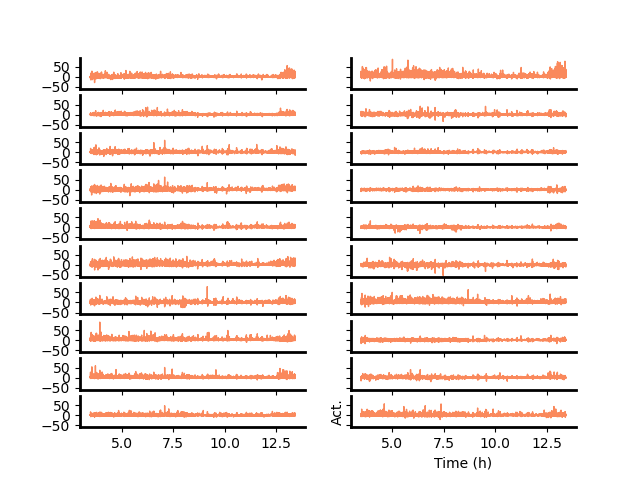

In [20]:
%matplotlib widget

maze_ensembles.plot_activation()
# plt.plot(np.mean(maze_ensembles.activation-mean_pre_activation,axis=0))

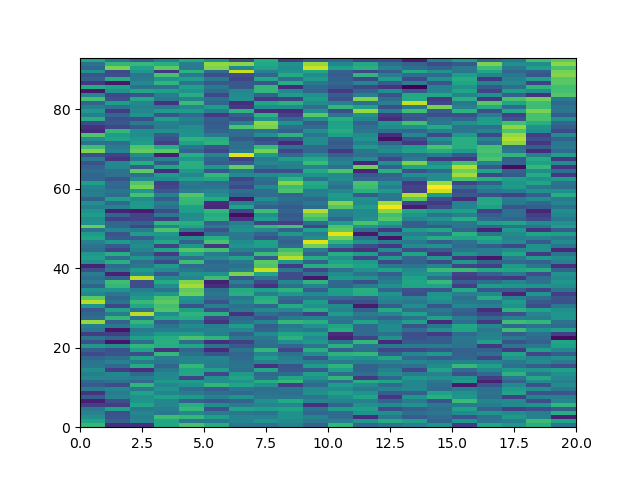

In [42]:
%matplotlib widget
from scipy import stats
a = maze_ensembles.weights 
a_zsc = stats.zscore(a,axis=0) 
a_sig_logical = np.where(a_zsc>1.5,1,0)
b = np.sort(a_sig_logical,axis=0)
# maze_ensembles.plot_ensembles()
c = np.lexsort(a_sig_logical.T)
a_new = a[c,:]
plt.pcolormesh(a_new)

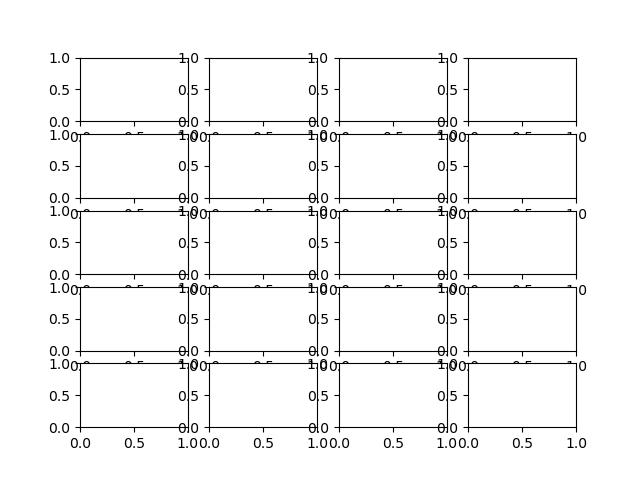

In [7]:
_,ax = plt.subplots()

In [13]:
b = np.squeeze(ax)


(5, 4)

In [40]:
np.lexsort(a_sig_logical.T)

array([ 3,  5,  6,  8, 26, 27, 28, 35, 38, 42, 43, 48, 50, 53, 54, 62, 64,
       72, 73, 74, 78, 79, 80, 82, 84, 91, 20, 69, 13, 59, 86, 68, 89, 32,
       71, 49, 56, 83, 44, 10, 66, 46, 70, 41, 24, 22, 15, 37, 60, 77, 58,
       87, 57, 51, 61, 39, 63,  2, 23,  4, 19, 90, 31,  7, 11, 75, 18, 25,
       65, 55,  1, 36, 47, 40, 88, 30, 29, 45, 21, 33,  9, 17, 34, 14, 16,
       76, 81, 67,  0, 85, 12, 52, 92])